Using the Housing Price Dataset, this project wants to predict the surface of a property using regression.

Importing the required packages

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error

Importing the dataset

In [ ]:
dataset = pd.read_csv('Bucharest_HousePriceDataset.csv')
dataset

,Nr Camere,Suprafata,Etaj,Total Etaje,Sector,Scor,Pret
0,4,108.00,2,3,4,5,83000
1,1,41.00,1,8,1,1,39900
2,3,63.52,1,3,2,3,84900
3,1,33.00,3,10,5,1,45500
4,2,62.00,5,9,5,5,54900
...,...,...,...,...,...,...,...
3524,3,102.00,2,5,1,1,189000
3525,4,96.00,1,3,3,2,200000
3526,1,35.00,1,3,4,5,47000
3527,2,60.00,6,7,1,2,89500


We modify the data into a Pytorch friendly format, and then we separate it into training and testing.

In [ ]:
X = dataset.iloc[: ,[0,2,3,4,5,6]].values
y = dataset.iloc[: ,1].values
y = y.reshape(y.size, 1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
y_train = sc.fit_transform(y_train)
y_val = sc.transform(y_val)

In [ ]:
X_train = torch.Tensor(X_train)
X_val = torch.Tensor(X_val)
y_train = torch.Tensor(y_train)
y_val = torch.Tensor(y_val)

Defining the linear regression model

In [ ]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [ ]:
torch.manual_seed(1)
model = LR(6, 1)
[w, b] = model.parameters()

def get_params():
  return (w[0][0].item(), b[0].item())

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

In [ ]:
epochs = 500
losses = []
for i in range(epochs):
  y_pred = model(X_train)
  loss = criterion(y_pred, y_train)
  print("epoch:", i, "loss:", loss.item())

  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Text(0.5, 0, 'epoch')

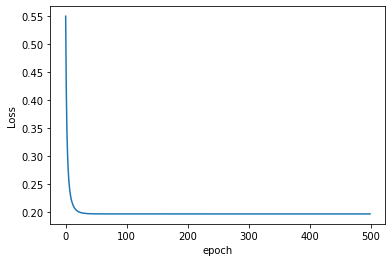

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel("epoch")

Calculating the accuracy of the model


In [ ]:
with torch.no_grad():
    y_pred = model(X_train)
accuracy = (abs(y_pred.round() - y_train.numpy()) <= 0.6).sum()/y_pred.shape[0]
print(accuracy)

tensor(0.7697)


In [ ]:
with torch.no_grad():
    pred_y_val = model(X_val)
accuracy = (abs(pred_y_val.round() - y_val.numpy()) <= 0.6).sum()/pred_y_val.shape[0]
print(accuracy)

tensor(0.7564)


In [ ]:
mse = mean_squared_error(y_pred, y_train)
mse

0.19735768

As opposed to the other problem solved by using regression, here the Mean Squared Error is a lot smaller, which indicates the fact that the property surface is a much better characteristic for a regression problem.